In [1]:
# Import packages 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import hamming_loss

In [2]:
# Import data
data = pd.read_csv('../recipe_ingredients_dataset/ingredient_df_with_recipenames.csv')

# Remove categorical columns 
recipes_ingredients_matrix = data.select_dtypes(include=[np.number])

In [3]:
# Convert binary recipe matrix to float
recipes_ingredients_matrix_float = recipes_ingredients_matrix.astype(np.float64)

In [21]:
hamming_dists = []

# Number of components for Truncated SVD
n_components_test = [100, 500, 1000, 1500, 2000, 3000]

for k in n_components_test:
    # Run Truncated SVD with randomized algorithm for optimal k vectors
    truncated_svd = TruncatedSVD(n_components=k, algorithm='randomized', random_state=42)

    # Fit and transform the data to reduce its dimensions
    X_reduced = truncated_svd.fit_transform(recipes_ingredients_matrix_float)

    # Reconstruct the matrix from the reduced dimensions
    X_reconstructed = truncated_svd.inverse_transform(X_reduced)

    # Binarize the reconstructed matrix by applying a threshold
    X_binarized = np.where(X_reconstructed >= 0.5, 1, 0)

    # Flatten the original DataFrame and the reconstructed numpy array into 1D arrays
    flat_original = recipes_ingredients_matrix.values.flatten()
    flat_reconstructed = X_binarized.flatten()

    # Calculate the Hamming distance as the total count of mismatches
    hamming_dist = np.sum(flat_original != flat_reconstructed)

    
    hamming_dists.append(hamming_dist)

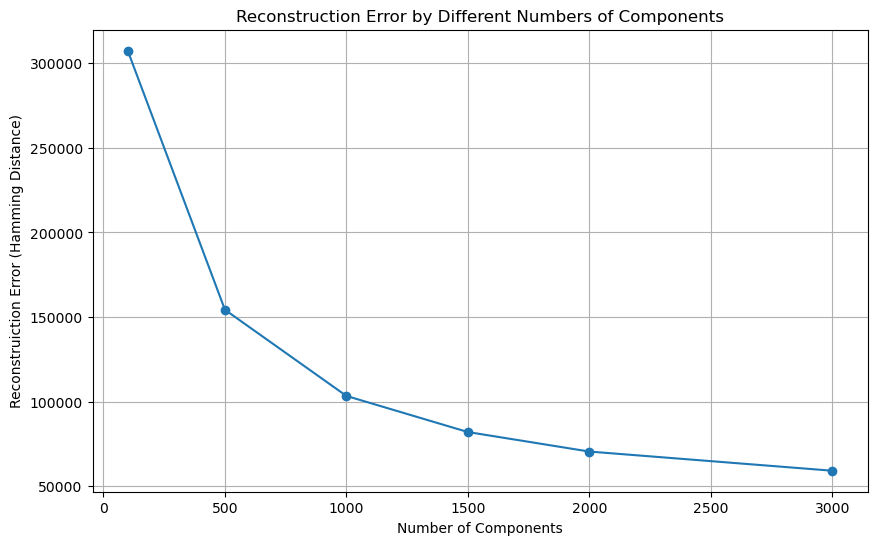

In [22]:
# Plotting the Hamming DIstance
plt.figure(figsize=(10, 6))
plt.plot(n_components_test, hamming_dists, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Reconstruiction Error (Hamming Distance)')
plt.title('Reconstruction Error by Different Numbers of Components')
plt.grid(True)
plt.show()

In [56]:
# Plotting the Hamming Distance as percentage
plt.figure(figsize=(10, 6))
plt.plot(n_components_test, hamming_dists/(49718 * 7140), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Reconstruiction Error (Hamming Distance)')
plt.title('Reconstruction Error by Different Numbers of Components')
plt.grid(True)
plt.show()

TypeError: unsupported operand type(s) for /: 'list' and 'int'

<Figure size 1000x600 with 0 Axes>

In [23]:
hamming_dists

[307481, 154296, 103337, 81983, 70440, 59108]

In [25]:
# SVD with 1000 components
truncated_svd = TruncatedSVD(n_components= 1000, algorithm='randomized', random_state=42)

# Fit and transform the data to reduce its dimensions
X_reduced = truncated_svd.fit_transform(recipes_ingredients_matrix_float)

In [26]:
X_reduced

array([[ 1.59820397e-05,  5.54280322e-01, -6.29184856e-01, ...,
        -4.58715816e-03,  1.41882662e-02, -1.39763832e-02],
       [ 1.00003207e+00,  1.35880748e+00, -4.08708560e-01, ...,
         4.82146803e-02,  1.35692629e-02, -1.57233697e-02],
       [ 2.00002618e+00,  1.02816745e+00,  7.20897107e-01, ...,
         1.56412661e-02, -6.64621287e-03, -7.33712836e-04],
       ...,
       [ 4.97150000e+04, -1.05954934e+00, -1.34919423e-01, ...,
         1.03135829e-01,  2.52419585e-02, -2.52310136e-02],
       [ 4.97160000e+04,  6.14661129e-01, -4.98797712e-01, ...,
         3.82916296e-02,  3.85755133e-02, -5.78741617e-02],
       [ 4.97170000e+04,  3.62137776e-01, -3.72867364e-01, ...,
        -2.66780996e-02, -5.63839694e-02, -8.86111975e-05]])

In [37]:

# V^T is already provided correctly by the model
Vt = truncated_svd.components_  # Shape (3, 5), this is V^T

singular_values = truncated_svd.singular_values_  

# Calculating U 
U = X_reduced / singular_values[np.newaxis, :]  # Broadcasting singular_values

# Calculating V 
V = Vt.T  

In [38]:
U

array([[ 2.49705961e-12,  3.83412223e-03, -5.53264921e-03, ...,
        -6.22593674e-04,  1.92816277e-03, -1.90106124e-03],
       [ 1.56246620e-07,  9.39927646e-03, -3.59392168e-03, ...,
         6.54395464e-03,  1.84404120e-03, -2.13868554e-03],
       [ 3.12487310e-07,  7.11214081e-03,  6.33910809e-03, ...,
         2.12291641e-03, -9.03209738e-04, -9.97992837e-05],
       ...,
       [ 7.76755161e-03, -7.32921868e-03, -1.18639512e-03, ...,
         1.39981471e-02,  3.43034194e-03, -3.43191091e-03],
       [ 7.76770785e-03,  4.25179428e-03, -4.38610806e-03, ...,
         5.19714505e-03,  5.24235078e-03, -7.87201695e-03],
       [ 7.76786409e-03,  2.50501496e-03, -3.27875712e-03, ...,
        -3.62089455e-03, -7.66249158e-03, -1.20528545e-05]])

In [39]:
V

array([[ 1.00000000e+00, -2.25404146e-05, -4.19030734e-07, ...,
        -1.83962572e-08,  2.51521134e-08, -1.78266664e-08],
       [ 6.61159454e-10, -1.61241423e-05, -1.78722285e-05, ...,
        -8.64581495e-06,  3.74869446e-05,  1.51853454e-05],
       [ 5.87641960e-09,  4.08256735e-05, -3.67175619e-04, ...,
        -1.76083428e-04, -1.03233704e-03, -7.62908212e-04],
       ...,
       [ 1.37716165e-08,  6.10280954e-04, -5.64065151e-05, ...,
         9.11736697e-04,  5.67437794e-05,  3.56483313e-04],
       [ 4.74849388e-08,  9.19416446e-04,  6.81203222e-04, ...,
        -2.59265419e-02,  1.82501990e-03,  1.15139301e-02],
       [ 7.31757340e-10,  2.78580915e-05, -1.11901777e-05, ...,
        -2.15699664e-03, -9.43312219e-04,  1.71678785e-04]])

In [45]:
V.shape

(7138, 1000)

In [46]:
U.shape

(49718, 1000)

In [57]:
# Convert U and V matrix to dataframes
U_df = pd.DataFrame(U, columns=[f'U_{i+1}' for i in range(1000)])
V_df = pd.DataFrame(V, columns=[f'V_{i+1}' for i in range(1000)])

In [58]:
U_df

,U_1,U_2,U_3,U_4,U_5,U_6,U_7,U_8,U_9,U_10,...,U_991,U_992,U_993,U_994,U_995,U_996,U_997,U_998,U_999,U_1000
0,2.497060e-12,0.003834,-0.005533,-0.007139,0.010462,0.005543,0.000410,0.001604,0.001662,0.002764,...,0.001070,0.001449,0.000785,-3.691620e-07,0.000895,-0.000413,0.000993,-0.000623,0.001928,-0.001901
1,1.562466e-07,0.009399,-0.003594,0.000885,-0.004550,0.000086,-0.005395,0.006466,0.006879,-0.010623,...,0.009114,0.007208,-0.002310,1.855929e-02,0.004649,-0.016690,0.002221,0.006544,0.001844,-0.002139
2,3.124873e-07,0.007112,0.006339,-0.000478,-0.003034,0.001461,0.001043,0.001412,-0.000395,0.010014,...,0.000043,-0.001526,0.001586,1.130813e-03,0.002086,0.002065,0.000863,0.002123,-0.000903,-0.000100
3,4.687277e-07,0.003213,-0.002742,0.011492,0.001561,0.008850,-0.004824,0.006480,-0.001722,0.008660,...,-0.000077,0.000459,0.000221,5.458342e-04,0.000725,-0.000796,0.000358,-0.000349,-0.000623,0.000283
4,6.249665e-07,-0.000011,0.000064,0.000014,0.000031,0.000053,0.000050,-0.000034,-0.000043,-0.000087,...,0.003842,0.005024,0.002451,-7.420424e-03,0.007671,-0.001740,-0.002272,-0.005952,-0.006473,-0.000014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49713,7.767239e-03,-0.006303,0.001988,-0.002440,-0.001328,0.000115,0.001524,0.000037,0.000093,0.000083,...,0.000457,0.000697,0.000931,6.127110e-04,-0.001397,-0.000248,0.000502,-0.000266,0.000089,-0.000417
49714,7.767395e-03,-0.002542,-0.007222,0.004026,-0.006853,0.000773,0.007117,-0.000624,-0.002150,0.002484,...,-0.002189,-0.003512,-0.004967,-1.944022e-03,0.003271,0.011412,0.002175,-0.002460,0.005773,0.014842
49715,7.767552e-03,-0.007329,-0.001186,-0.001690,-0.002304,-0.003168,-0.002089,0.000718,0.000471,-0.002962,...,0.020951,0.001452,0.002450,4.397351e-03,0.002231,-0.008867,0.005265,0.013998,0.003430,-0.003432
49716,7.767708e-03,0.004252,-0.004386,0.009027,-0.005856,-0.007294,0.002830,-0.006465,0.003255,-0.006989,...,0.005041,-0.004137,-0.011250,1.138911e-03,0.002842,0.008052,0.006908,0.005197,0.005242,-0.007872


In [59]:
V_df

,V_1,V_2,V_3,V_4,V_5,V_6,V_7,V_8,V_9,V_10,...,V_991,V_992,V_993,V_994,V_995,V_996,V_997,V_998,V_999,V_1000
0,1.000000e+00,-0.000023,-4.190307e-07,-0.000003,-0.000005,-0.000004,-0.000002,-0.000002,-2.248460e-07,-1.294935e-07,...,-7.835045e-09,9.486757e-13,-4.065147e-08,1.484476e-08,-6.879999e-09,1.979944e-08,3.450782e-09,-1.839626e-08,2.515211e-08,-1.782667e-08
1,6.611595e-10,-0.000016,-1.787223e-05,-0.000017,-0.000003,0.000022,0.000007,0.000039,1.023210e-04,-1.602729e-05,...,-1.275059e-04,6.747526e-05,-1.453135e-05,8.215739e-05,5.153047e-05,2.724776e-04,-1.256376e-04,-8.645815e-06,3.748694e-05,1.518535e-05
2,5.876420e-09,0.000041,-3.671756e-04,-0.000407,0.000221,0.000031,0.000394,-0.000113,-4.276777e-04,1.835682e-04,...,-4.794819e-04,-2.049212e-03,1.038244e-03,-4.875753e-04,-2.210212e-04,-1.884307e-03,1.418391e-03,-1.760834e-04,-1.032337e-03,-7.629082e-04
3,3.211423e-09,-0.000142,-5.536465e-06,-0.000033,-0.000074,-0.000064,-0.000030,-0.000032,-3.541483e-06,-2.306880e-05,...,-4.972127e-03,3.501741e-03,-1.970984e-03,-7.453173e-04,1.798267e-03,1.627933e-03,4.209349e-03,3.837122e-03,-4.856666e-03,-3.206836e-03
4,8.909932e-10,-0.000006,-5.719368e-05,-0.000026,-0.000015,0.000039,0.000095,-0.000017,-5.215734e-05,-2.254255e-05,...,1.379333e-04,-8.544241e-05,2.796171e-04,-1.882685e-04,-1.936721e-04,-3.264405e-04,2.829547e-05,2.193903e-04,-1.371872e-04,2.637034e-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7133,1.657757e-09,-0.000073,1.436818e-06,-0.000013,-0.000034,-0.000027,-0.000018,-0.000017,-2.943988e-06,6.507003e-06,...,2.678034e-04,1.248059e-03,6.888878e-04,4.263476e-03,-3.434852e-03,4.928270e-04,1.292086e-03,-8.609991e-04,1.168068e-03,1.875757e-03
7134,7.016092e-10,-0.000031,-9.552336e-07,-0.000008,-0.000017,-0.000015,-0.000006,-0.000009,-1.014600e-06,-4.846053e-07,...,-1.021878e-04,1.137693e-03,1.064817e-03,6.319839e-04,-5.772548e-04,-1.309943e-04,6.149071e-04,1.102989e-04,-4.413189e-04,3.487171e-04
7135,1.377162e-08,0.000610,-5.640652e-05,0.000116,-0.000546,-0.000179,-0.000045,0.000515,3.722536e-04,-8.894436e-04,...,1.713240e-03,-1.315691e-03,-6.371235e-03,-6.424143e-03,4.888932e-03,4.646444e-03,2.295489e-02,9.117367e-04,5.674378e-05,3.564833e-04
7136,4.748494e-08,0.000919,6.812032e-04,-0.000050,0.000923,0.000363,0.000968,0.001908,1.366235e-03,2.422753e-03,...,-5.497181e-03,4.530737e-03,1.824821e-02,1.428440e-02,-7.826728e-03,9.956623e-03,-1.666912e-03,-2.592654e-02,1.825020e-03,1.151393e-02


In [27]:
# Convert SVD output to DataFrame
svd_columns = [f'SVD_Component_{i}' for i in range(X_reduced.shape[1])]
svd_df = pd.DataFrame(X_reduced, columns=svd_columns)

# Match indices of original data index 
svd_df.index = data.index

In [28]:
svd_df

,SVD_Component_0,SVD_Component_1,SVD_Component_2,SVD_Component_3,SVD_Component_4,SVD_Component_5,SVD_Component_6,SVD_Component_7,SVD_Component_8,SVD_Component_9,...,SVD_Component_990,SVD_Component_991,SVD_Component_992,SVD_Component_993,SVD_Component_994,SVD_Component_995,SVD_Component_996,SVD_Component_997,SVD_Component_998,SVD_Component_999
0,0.000016,0.554280,-0.629185,-0.737221,0.978710,0.491779,0.035597,0.132651,0.132547,0.212225,...,0.007976,0.010786,0.005834,-0.000003,0.006631,-0.003055,0.007339,-0.004587,0.014188,-0.013976
1,1.000032,1.358807,-0.408709,0.091443,-0.425679,0.007603,-0.468103,0.534589,0.548642,-0.815588,...,0.067961,0.053649,-0.017169,0.137829,0.034453,-0.123433,0.016411,0.048215,0.013569,-0.015723
2,2.000026,1.028167,0.720897,-0.049415,-0.283843,0.129644,0.090463,0.116706,-0.031517,0.768791,...,0.000319,-0.011358,0.011786,0.008398,0.015459,0.015270,0.006379,0.015641,-0.006646,-0.000734
3,3.000019,0.464518,-0.311878,1.186856,0.146034,0.785241,-0.418566,0.535769,-0.137354,0.664892,...,-0.000574,0.003414,0.001646,0.004054,0.005370,-0.005891,0.002647,-0.002575,-0.004586,0.002079
4,4.000000,-0.001619,0.007258,0.001440,0.002910,0.004734,0.004346,-0.002838,-0.003403,-0.006643,...,0.028648,0.037398,0.018218,-0.055107,0.056857,-0.012867,-0.016785,-0.043853,-0.047629,-0.000106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49713,49712.999994,-0.911249,0.226122,-0.252014,-0.124207,0.010181,0.132194,0.003020,0.007393,0.006401,...,0.003408,0.005189,0.006924,0.004550,-0.010351,-0.001837,0.003707,-0.001959,0.000658,-0.003062
49714,49714.000003,-0.367427,-0.821295,0.415770,-0.641109,0.068586,0.617562,-0.051592,-0.171478,0.190721,...,-0.016324,-0.026140,-0.036923,-0.014437,0.024240,0.084399,0.016069,-0.018125,0.042480,0.109115
49715,49714.999989,-1.059549,-0.134919,-0.174509,-0.215559,-0.281055,-0.181244,0.059345,0.037572,-0.227408,...,0.156219,0.010804,0.018214,0.032657,0.016538,-0.065579,0.038899,0.103136,0.025242,-0.025231
49716,49716.000024,0.614661,-0.498798,0.932263,-0.547808,-0.647167,0.245559,-0.534546,0.259585,-0.536591,...,0.037587,-0.030792,-0.083628,0.008458,0.021064,0.059547,0.051038,0.038292,0.038576,-0.057874


In [32]:
# Concatenate the SVD DataFrame with the original categorical data
combined_data = pd.concat([data, svd_df], axis=1)

# Drop the 'id' column from the DataFrame
combined_data = combined_data.drop('id', axis=1)

In [33]:
combined_data

,cuisine,alexia waffle fries,perciatelli,sweet and sour mix,corn bread crumbs,black cardamom pods,tumeric,fresh marjoram,sweet soy sauce,johnsonville hot & spicy breakfast links,...,SVD_Component_990,SVD_Component_991,SVD_Component_992,SVD_Component_993,SVD_Component_994,SVD_Component_995,SVD_Component_996,SVD_Component_997,SVD_Component_998,SVD_Component_999
0,spanish,0,0,0,0,0,0,0,0,0,...,0.007976,0.010786,0.005834,-0.000003,0.006631,-0.003055,0.007339,-0.004587,0.014188,-0.013976
1,mexican,0,0,0,0,0,0,0,0,0,...,0.067961,0.053649,-0.017169,0.137829,0.034453,-0.123433,0.016411,0.048215,0.013569,-0.015723
2,french,0,0,0,0,0,0,0,0,0,...,0.000319,-0.011358,0.011786,0.008398,0.015459,0.015270,0.006379,0.015641,-0.006646,-0.000734
3,chinese,0,0,0,0,0,0,0,0,0,...,-0.000574,0.003414,0.001646,0.004054,0.005370,-0.005891,0.002647,-0.002575,-0.004586,0.002079
4,italian,0,0,0,0,0,0,0,0,0,...,0.028648,0.037398,0.018218,-0.055107,0.056857,-0.012867,-0.016785,-0.043853,-0.047629,-0.000106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49713,southern_us,0,0,0,0,0,0,0,0,0,...,0.003408,0.005189,0.006924,0.004550,-0.010351,-0.001837,0.003707,-0.001959,0.000658,-0.003062
49714,irish,0,0,0,0,0,0,0,0,0,...,-0.016324,-0.026140,-0.036923,-0.014437,0.024240,0.084399,0.016069,-0.018125,0.042480,0.109115
49715,filipino,0,0,0,0,0,0,0,0,0,...,0.156219,0.010804,0.018214,0.032657,0.016538,-0.065579,0.038899,0.103136,0.025242,-0.025231
49716,indian,0,0,0,0,0,0,0,0,0,...,0.037587,-0.030792,-0.083628,0.008458,0.021064,0.059547,0.051038,0.038292,0.038576,-0.057874


In [35]:
combined_data.to_csv('../recipe_ingredients_dataset/SVD_data.csv')

In [60]:

U_df.to_csv('../recipe_ingredients_dataset/U_matrix.csv')
V_df.to_csv('../recipe_ingredients_dataset/V_matrix.csv')